# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: 
Outcome = return a list of free-tier customers who are likely to convert to paying customers.

#### 2. What are the predictors/covariates? 

Answer: 
Predictors/covariates = age, gender, location, profession, last login, activity score (active or not)

#### 3. What timeframe is this data relevent for?

Answer:
January - April 2015

#### 4. What is the hypothesis?

Answer:
There is a relationship between the demographics of a customer and his/her use of the product that will tell us which of the free-tier customers will be likely to decide to start paying for the service

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Summary |Description | Type of Variable
---| ---| ---
admit |admitted to UCLA or not |0 = not admitted, 1 = admitted to UCLA | categorical
gre |Graduate Record Examination (standardize test| integers - range from 200-800| discrete
gpa | Grade Point Average |floats with precision to the hundreths - range from 0.00 - 4.00 |conintuous
prestige | ranks of current school | integars 4 to 1 (1 being highest)|ordinal catagorical


We would like to explore the association between X and Y 

In [2]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [3]:
df1 = pd.read_csv(
    "../assets/admissions.csv")

In [4]:
print df1.head ()
print df1.describe()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [5]:
print df1.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object


In [6]:
df1.count()
#We see a total of 400 rows, but two rows have two null values (gre & gpa) and one row has one null value (prestige)

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [7]:
df = df1.dropna()
df.count()
#here we are dropping the null values so we are left with 397 rows
#removing the null values has little effect on the mean and standard deviation

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [8]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [9]:
rows, col = df.shape
print rows
print col

397
4


In [10]:
#renaming the "Rank" column because there is already a "rank" method
df.columns = ["admit", "gre", "gpa", "prestige"]
print df.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


In [11]:
dfAdmit = df[ df.admit == 1]
dfNoAdmit = df [ df.admit == 0]

print dfAdmit.describe()
print dfNoAdmit.describe()

#You can tell a lot by just looking at the statistics for those admitted and those not

       admit         gre         gpa    prestige
count  126.0  126.000000  126.000000  126.000000
mean     1.0  618.571429    3.489206    2.150794
std      0.0  109.257233    0.371655    0.921455
min      1.0  300.000000    2.420000    1.000000
25%      1.0  540.000000    3.220000    1.000000
50%      1.0  620.000000    3.545000    2.000000
75%      1.0  680.000000    3.757500    3.000000
max      1.0  800.000000    4.000000    4.000000
       admit         gre         gpa    prestige
count  271.0  271.000000  271.000000  271.000000
mean     0.0  573.579336    3.347159    2.645756
std      0.0  116.052798    0.376355    0.918922
min      0.0  220.000000    2.260000    1.000000
25%      0.0  500.000000    3.080000    2.000000
50%      0.0  580.000000    3.340000    3.000000
75%      0.0  660.000000    3.610000    3.000000
max      0.0  800.000000    4.000000    4.000000


In [12]:
dic = {
    "variables": ["gre", "gpa", "prestige"],
    "means" : [587.86, 3.39, 2.49],
    "stds": [115.72, .38, .95]
}

cpdfAdmit = dfAdmit.gre.mean() / dfAdmit.gre.std()
cpdfNoAdmit = dfNoAdmit.gre.mean() / dfNoAdmit.gre.std()

print cpdfAdmit
print cpdfNoAdmit

print dic

5.6616062326
4.9423998707
{'variables': ['gre', 'gpa', 'prestige'], 'stds': [115.72, 0.38, 0.95], 'means': [587.86, 3.39, 2.49]}


#### 2. What is the outcome?

Answer:
Outcome = returns whether a student will be admitted to grad school at UCLA or not

#### 3. What are the predictors/covariates? 

Answer:
Predictors/covariates = gre, gpa, rank

#### 4. What timeframe is this data relevent for?

Answer:
There is no indication in the dataset what year this is for (not even in the path).  I am making the assumption that date is not relevant for this dataset.

#### 4. What is the hypothesis?

Answer:
If a student performs well on their GRE, has a high GPA, and attends a highly ranked school then he/she is more likely to be admitted to UCLA grad school than a student who does not perform wel on their GRE, has a low GPA, and attends a lower ranked school.

Using the above information, write a well-formed problem statement. 


## Problem Statement:
Using students' GRE scores, GPA, and current school rankings, we can predict if a student is admitted to the UCLA Graduate School program.  We will use admissions data from past years to determine which combination of student metrics is the best predictor for admission to the program.


### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: 
Our goal is to identify the various factos that may influence admission into UCLA grad school.  We are looking to determine the respective importance of an applicant's GRE score, GPA, and rank of current school in the admission process.

#### 2a. What are the assumptions of the distribution of data? 

Answer:
Normality - We will be making the assumption that the data is normally distributed.  Most inferential statistics (e.g. regression, t-tests, ANOVA, etc.) rely on the assumption of normailty.  These statistical procedures are parametric, meaning that they assume the sample data comes from a population that follows a probability distribution based on a fixed set of parameters.  When the assumptions are correct, parametric methods will produce more accurate and precise estimates than non-parametric methods.  For this problem we will assume a normal distribution, meaning the skewness and kurtosis is zero.  If the data is not normalized, then it will need to be normalized or we will need to use a different model.

#### 2b. How will determine the distribution of your data? 

Answer: 
We can determine the distribution by first plotting the data and using simple descriptive statistics (e.g. density plots and histograms).  As a second step, we can use distribution fitting tests to find which distribution is the better fit for the data.


In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

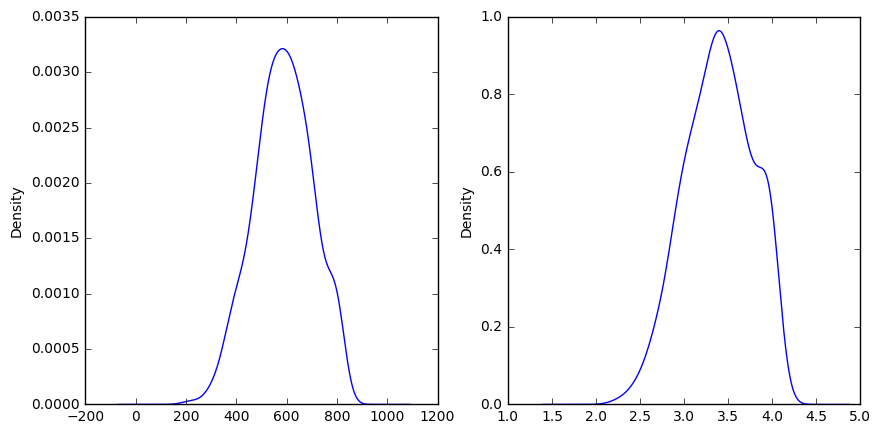

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))

df.gre.plot(kind="density", ax=axs[0])
df.gpa.plot(kind="density", ax=axs[1])

RuntimeError: Can not put single artist in more than one figure

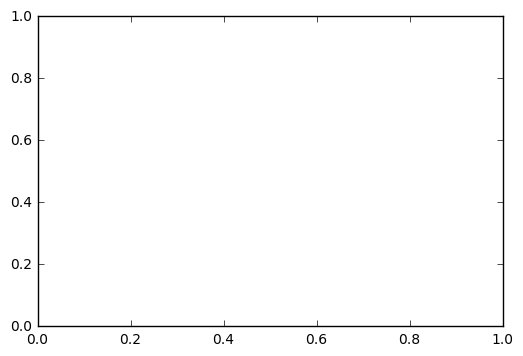

In [15]:
plt.figure()
df.gre.plot.kde(title = 'GRE', figure = (10,10))



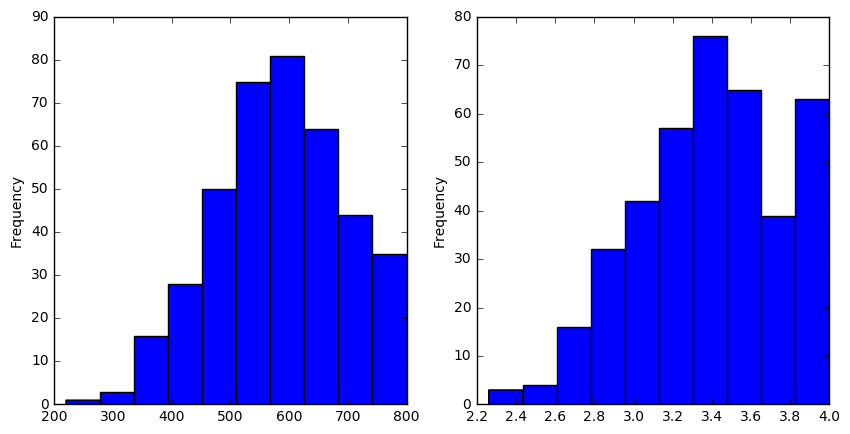

In [16]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))

df.gre.plot(kind="hist", ax=axs[0])
df.gpa.plot(kind="hist", ax=axs[1])

#### 3a. How might outliers impact your analysis? 

Answer:
Outliers are important because most parametric statistics (e.g. mean, standard deviation, and correlations) are highly sensititve to outliers.  Since the assumptions of common statistical methods (e.g. linear regression) are based on these statistics, outliers can skew the data and impact the analysis.  More outliers will push your mean to the right/left.  The outliers in a sample have even more effect on the jurtosis than they do on the skewness and in a symmetric distribution both tails increase the kurtosis, unlike skewness where they offset each other.

#### 3b. How will you test for outliers? 

Answer:
We can test for outliers by plotting the data using a boxplot.  See below for two outliers for GRE (300 and 200) and one for GPA (2.25)

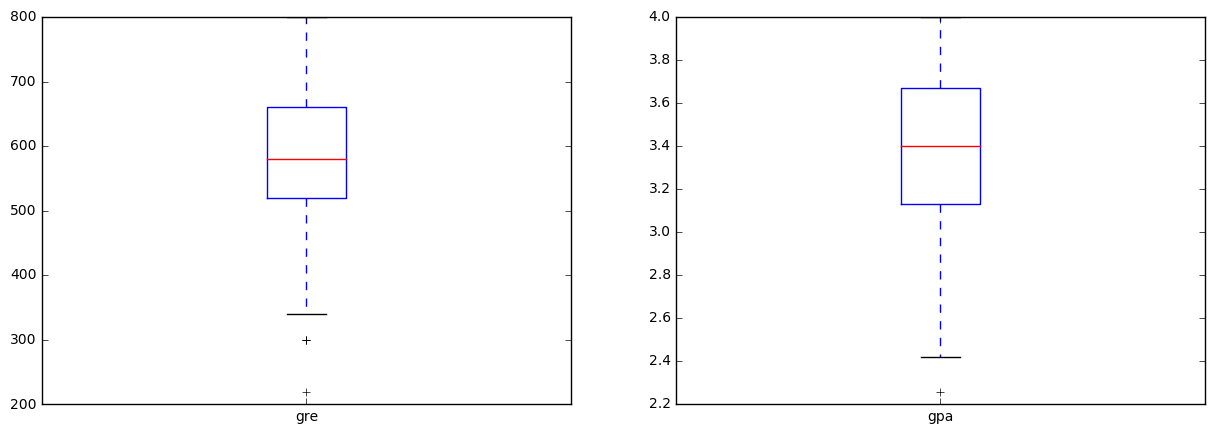

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))
df.gre.plot.box(ax=axs[0])
df.gpa.plot.box(ax=axs[1])

In [18]:
print df.groupby("prestige").size()
print df.groupby(["prestige", "admit"]).size()

#there should be 8 groups (i.e. 8 keys)
#same thing as groupby... print pd.crosstab(df.prestige, df.admit)

prestige
1.0     61
2.0    148
3.0    121
4.0     67
dtype: int64
prestige  admit
1.0       0        28
          1        33
2.0       0        95
          1        53
3.0       0        93
          1        28
4.0       0        55
          1        12
dtype: int64


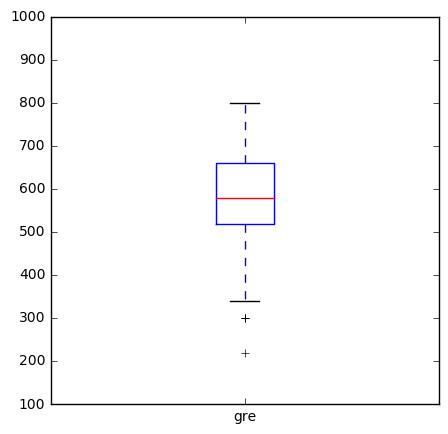

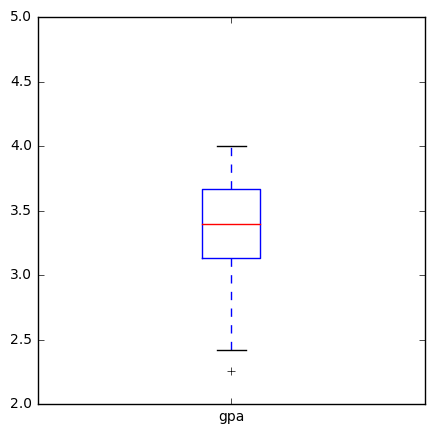

In [19]:
fig, ax1 = plt.subplots(1, figsize = (5,5))
ax1.set_ylim([100, 1000])
df.gre.plot.box()

fig, ax2 = plt.subplots(1, figsize = (5,5))
ax2.set_ylim([2, 5])
df.gpa.plot.box()

#### 4a. What is colinearity? 

Answer: 
Colinearity indicates a very strong interdependence between two predictor variables.  In a regression model, colinearity is when two or more predictor variables are highly correlated, meaning that one can be linearly predicted from the others with high accuracy.  

In [33]:
df [["gre", "gpa", "prestige"]].corr()
#Colinearity does not care about your target column so instead of just... df.corr() use the above

,gre,gpa,prestige
gre,1.000000,0.382408,-0.124533
gpa,0.382408,1.000000,-0.060976
prestige,-0.124533,-0.060976,1.000000


#### 4b. How will you test for colinearity? 

Answer:
We can test if two variables are colinear by graphically plotting them on two axis (i.e. linear regression).  If colinearity exists, we will see a line with a slope.  If the line is horizontal or vertical, then no relationship exists.  We can also test this using the correlation method, where (-1 <- correlation <= 1)(-1 => highly negative correlated)(1 => positive correlated)(0 => no correlation)(-1 <=  correlation <= 1).


In [107]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


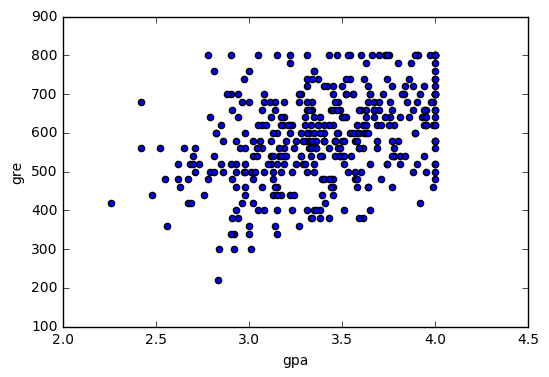

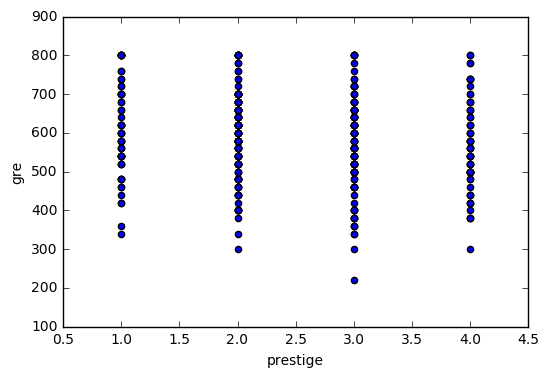

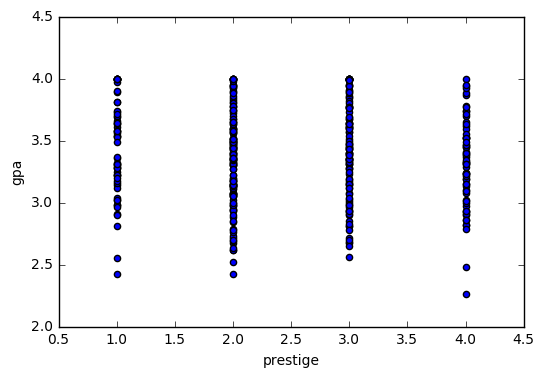

In [20]:
df.plot.scatter( x ='gpa', y = 'gre' )
df.plot.scatter( x ='prestige', y = 'gre') 
df.plot.scatter( x ='prestige', y = 'gpa' )

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 
1. Clean the dataset (i.e. rid of null values and rename any columns).
2. Identify your predictors and create a data dictionary.
3. Formulate your hypothesis and outline your analysis method based on the information provided.
4. Test for outliers by plotting the data (e.g. boxplots) and remove if necessary.
5. Test for colinearity between all pairs of predictors by plotting the data (e.g. scatterplot) or using descriptive statistics method (e.g. df.corr())
6. Generate linear regressions between each of the predictors and the outcome.
7. If there is a high correlation between two predictors, you can remove one of the highly correlated predictors from the model because they supply redundant information.
8. Determine the R-squared values (a statistical measure of how close the data are to the fitted regression).  In general, the higher the R-Squared the better the model fits your data. Select the model that has the highest R-squared value.
9. Generate the model (linear regression).
10. Generate a random sample to simulate outcomes and compare your simulation results.


## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model